# ETL com pandas e Matplotlib

> Extract, Transform, Load.\
Extração (Extract): Copiar ou exportar os dados brutos de uma fonte para uma área de preparação \
Transformação (Transform): Limpar, normalizar, agregar os dados e realizar outras operações para torná-los úteis \
Carregamento (Load): Carregar os dados transformados

### Extração
Representa o acesso inicial aos dados brutos e a preparação para torná-los disponíveis.\
*Todos os arquivos de referência foram coletados da [Pesquisa anual de desenvolvedores do Stack Overflow](https://survey.stackoverflow.co/) e estão sobre a [licença](#-licença) ODbL 1.0.*

  1. #### Arquivos baixados:
      `stack-overflow-developer-survey-2018.zip`\
      `stack-overflow-developer-survey-2019.zip`\
      `stack-overflow-developer-survey-2020.zip`\
      `stack-overflow-developer-survey-2021.zip`\
      `stack-overflow-developer-survey-2022.zip`\
      `stack-overflow-developer-survey-2023.zip`\
      `stack-overflow-developer-survey-2024.zip`
      ##### Diretório referência: `/SO_DeveloperSurvey_2018-2024/`

  2. #### Arquivos:
      Os arquivos `survey_results_public.csv` de cada ano foram extraídos dos seus `.zip` respectivos.\
      Todos os arquivos foram renomeados com o seguinte padrão: `survey_results_public_[year].csv`, onde `[year]` corresponde ao ano equivalente.

  3. #### Resultado da preparação:
      `survey_results_public_2018.csv`\
      `survey_results_public_2019.csv`\
      `survey_results_public_2020.csv`\
      `survey_results_public_2021.csv`\
      `survey_results_public_2022.csv`\
      `survey_results_public_2023.csv`\
      `survey_results_public_2024.csv`

In [ ]:
%%shell
pwd
cd drive/MyDrive/Colab_Notebooks
pwd
ls
cd SO_DeveloperSurvey_2018-2024
ls

/content
/content/drive/MyDrive/Colab_Notebooks
Pred_DeveloperSurvey.ipynb  SO_DeveloperSurvey_2018-2024
survey_results_public_2018.csv	survey_results_public_2023.csv	survey_results_schema_2021.csv
survey_results_public_2019.csv	survey_results_public_2024.csv	survey_results_schema_2022.csv
survey_results_public_2020.csv	survey_results_schema_2018.csv	survey_results_schema_2023.csv
survey_results_public_2021.csv	survey_results_schema_2019.csv	survey_results_schema_2024.csv
survey_results_public_2022.csv	survey_results_schema_2020.csv


### Extração e Transformação
> A transformação envolve limpar, organizar, reformatar e processar os dados para que fiquem em um formato adequado para análise.

  1. #### Importando as bibliotecas:
    * `os` é uma biblioteca padrão, vou usar para navegar pelos diretórios e ler os arquivos.
    * `pandas` para análise e manipulação de dados
    * `matplotlib` para visualização de dados

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

2. #### Dicionário para armazenar os DataFrames
    * Criação do dicionário `survey_data`
    * Variável `data_folder` com o caminho para a pasta onde estão os arquivos

In [ ]:
survey_data = {}
data_folder = '/content/drive/MyDrive/Colab_Notebooks/SO_DeveloperSurvey_2018-2024'

3. #### Criação dos DataFrames
    * Comando "os.listdir" para ler todos os arquivos no diretório da variável "data_folder".
    * Extrair o ano do arquivo a partir do comando "split", usando "_" e "." como referências.
    * Usar o nome extraído como chave para o dataset criado e armazenado no dicionário.

In [ ]:
for file in os.listdir(data_folder):
    if file.startswith('survey_results_public_') and file.endswith('.csv'):
        year = file.split('_')[-1].split('.')[0]
        survey_data[year] = pd.read_csv(os.path.join(data_folder, file))

<ipython-input-4-bbf7bc3049a9>:4: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  survey_data[year] = pd.read_csv(os.path.join(data_folder, file))


In [ ]:
print(survey_data.keys())

dict_keys(['2018', '2019', '2020', '2021', '2022', '2023', '2024'])


### Transformação
    
 > Usando a linha `for year, df in survey_data.items():` eu cosigo acessar cada dataframe, onde `year` é a chave do dicionário que desejo acessar e `df` é o dataframe.


1. #### Listagem das colunas

* Colunas presentes

In [ ]:
for year, df in survey_data.items():
    print(f"Colunas presentes em survey_data[{year}]: {', '.join(df.columns)}")

Colunas presentes em survey_data[2018]: Respondent, Hobby, OpenSource, Country, Student, Employment, FormalEducation, UndergradMajor, CompanySize, DevType, YearsCoding, YearsCodingProf, JobSatisfaction, CareerSatisfaction, HopeFiveYears, JobSearchStatus, LastNewJob, AssessJob1, AssessJob2, AssessJob3, AssessJob4, AssessJob5, AssessJob6, AssessJob7, AssessJob8, AssessJob9, AssessJob10, AssessBenefits1, AssessBenefits2, AssessBenefits3, AssessBenefits4, AssessBenefits5, AssessBenefits6, AssessBenefits7, AssessBenefits8, AssessBenefits9, AssessBenefits10, AssessBenefits11, JobContactPriorities1, JobContactPriorities2, JobContactPriorities3, JobContactPriorities4, JobContactPriorities5, JobEmailPriorities1, JobEmailPriorities2, JobEmailPriorities3, JobEmailPriorities4, JobEmailPriorities5, JobEmailPriorities6, JobEmailPriorities7, UpdateCV, Currency, Salary, SalaryType, ConvertedSalary, CurrencySymbol, CommunicationTools, TimeFullyProductive, EducationTypes, SelfTaughtTypes, TimeAfterBootc

* Criando um dicionário com listas (usando o ano como key) com o nome de cada coluna para referência futura
** Seguido da exibição de cada lista.

In [ ]:
colunas_total = {}

for year, df in survey_data.items():
    colunas_total[year] = df.columns.tolist()
    print(colunas_total[year])

['Respondent', 'Hobby', 'OpenSource', 'Country', 'Student', 'Employment', 'FormalEducation', 'UndergradMajor', 'CompanySize', 'DevType', 'YearsCoding', 'YearsCodingProf', 'JobSatisfaction', 'CareerSatisfaction', 'HopeFiveYears', 'JobSearchStatus', 'LastNewJob', 'AssessJob1', 'AssessJob2', 'AssessJob3', 'AssessJob4', 'AssessJob5', 'AssessJob6', 'AssessJob7', 'AssessJob8', 'AssessJob9', 'AssessJob10', 'AssessBenefits1', 'AssessBenefits2', 'AssessBenefits3', 'AssessBenefits4', 'AssessBenefits5', 'AssessBenefits6', 'AssessBenefits7', 'AssessBenefits8', 'AssessBenefits9', 'AssessBenefits10', 'AssessBenefits11', 'JobContactPriorities1', 'JobContactPriorities2', 'JobContactPriorities3', 'JobContactPriorities4', 'JobContactPriorities5', 'JobEmailPriorities1', 'JobEmailPriorities2', 'JobEmailPriorities3', 'JobEmailPriorities4', 'JobEmailPriorities5', 'JobEmailPriorities6', 'JobEmailPriorities7', 'UpdateCV', 'Currency', 'Salary', 'SalaryType', 'ConvertedSalary', 'CurrencySymbol', 'CommunicationT

2. #### Quantidade de linhas e colunas

   *  O total de pessoas que responderam em cada ano e o total de perguntas.
   **  Eu poderia ter listado as linhas com `len(df)`.
   ** Optei por usar `df.shape[0]` para padronizar o código, uma vez que usarei o `df.shape[1]` para iterar sobre as colunas.

In [ ]:
for year, df in survey_data.items():
    print(f'Ano {year}: {df.shape[0]} linhas e {df.shape[1]} colunas')

Ano 2018: 98855 linhas e 129 colunas
Ano 2019: 88883 linhas e 85 colunas
Ano 2020: 64461 linhas e 61 colunas
Ano 2021: 83439 linhas e 48 colunas
Ano 2022: 73268 linhas e 79 colunas
Ano 2023: 89184 linhas e 84 colunas
Ano 2024: 65437 linhas e 114 colunas


   * Armazenando o total de linhas e colunas para referência futura.

In [ ]:
respostas_por_ano = {}
for year, df in survey_data.items():
    respostas_por_ano[year] = [df.shape[0], df.shape[1]]
print(respostas_por_ano)

{'2018': [98855, 129], '2019': [88883, 85], '2020': [64461, 61], '2021': [83439, 48], '2022': [73268, 79], '2023': [89184, 84], '2024': [65437, 114]}


### Carregamento
> Gráfico com o que foi obtido até agora (total de respostas por ano)

1. #### Gráfico de Respostas por Ano
* Exibindo em barras.
** Conteúdo da variável `respostas_por_ano`: `{'2018': [98855, 129], '2019': [88883, 85], '2020': [64461, 61], '2021': [83439, 48], '2022': [73268, 77], '2023': [89184, 84], '2024': [65437, 114]}`
** E para melhor visualização:
    1. Quanto mais respostas (quantidade de linhas), mais forte a cor.
    2. Número acima de cada barra.
    3. Grid horizontal.

* * * Adicionando os valores de intensidade de cor ao dicionário `respostas_por_ano`

In [ ]:
anos = sorted(respostas_por_ano.keys())
valores = [respostas_por_ano[year][0] for year in anos]
step = round((1 - 0.6) / (len(respostas_por_ano) - 1), 3) # constante de passo para as cores
sorted_valores = sorted(valores, reverse=True)  # para normalização
intensidades = [round(1 - (sorted_valores.index(respostas_por_ano[year][0]) * step), 3) for year in anos]
for year, intensidade in zip(anos, intensidades): # emparelhando os anos com intensidade
    respostas_por_ano[year].append(intensidade)

print(respostas_por_ano) # dicionário respostas_por_ano modificado

{'2018': [98855, 129, 1.0], '2019': [88883, 85, 0.866], '2020': [64461, 61, 0.598], '2021': [83439, 48, 0.799], '2022': [73268, 79, 0.732], '2023': [89184, 84, 0.933], '2024': [65437, 114, 0.665]}


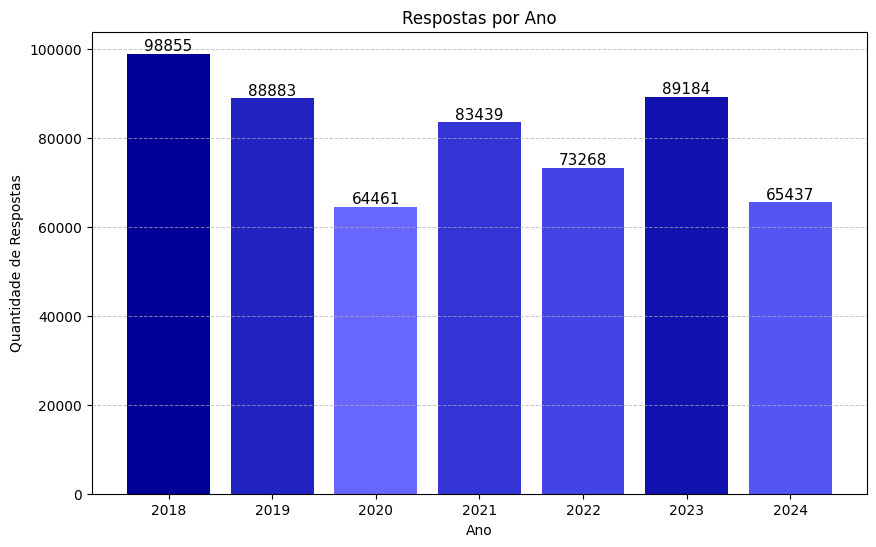

In [ ]:
cores = [valor[2] for valor in respostas_por_ano.values()]
cores_rgba = [(0, 0, round(min(1, 1.6 - c),2), c) for c in cores]


plt.figure(figsize=(10, 6))
bars = plt.bar(anos, valores, color=cores_rgba)

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), str(bar.get_height()), ha='center', va='bottom', fontsize=11)


plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

plt.xlabel('Ano')
plt.ylabel('Quantidade de Respostas')
plt.title('Respostas por Ano')

plt.savefig('grafico_respostas_porano.png', bbox_inches='tight')

plt.show()

### Transformação e Carregamento
> Visualizando outras informaçãoes

1. #### Exibindo o conteúdo
> *Colunas relevantes: 'LanguageWorkedWith', 'LanguageHaveWorkedWith', 'LanguageDesireNextYear', 'LanguageWantToWorkWith'*
* Exibindo o conteúdo relativo às respostas sobre linguagens de programação.

In [ ]:
for year, df in survey_data.items():
    if all(col in df.columns for col in ['LanguageWorkedWith', 'LanguageDesireNextYear']):
        print(df[['LanguageWorkedWith', 'LanguageDesireNextYear']].sample(n=2))
    elif all(col in df.columns for col in ['LanguageHaveWorkedWith', 'LanguageWantToWorkWith']):
        print(df[['LanguageHaveWorkedWith', 'LanguageWantToWorkWith']].sample(n=2))

        LanguageWorkedWith LanguageDesireNextYear
19692                  NaN                    NaN
84837  C;C++;C#;Python;SQL             C++;Python
       LanguageWorkedWith LanguageDesireNextYear
4932      Java;Python;SQL        Java;Python;SQL
6236  C#;HTML/CSS;PHP;SQL    C#;HTML/CSS;PHP;SQL
                                      LanguageWorkedWith  \
24925  Bash/Shell/PowerShell;C;C#;HTML/CSS;Java;JavaS...   
41834  Bash/Shell/PowerShell;Go;HTML/CSS;Java;JavaScr...   

                                  LanguageDesireNextYear  
24925  Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;P...  
41834                                Go;Python;Scala;SQL  
                                  LanguageHaveWorkedWith  \
5503   Bash/Shell;C++;HTML/CSS;JavaScript;Node.js;Python   
25508                                                NaN   

                                  LanguageWantToWorkWith  
5503   Assembly;Bash/Shell;C++;HTML/CSS;JavaScript;No...  
25508                                         

>
* Seguindo o schema do Stack Overflow:
  > * Os datasets usam nomes diferentes para colunas equivalentes:\
'LanguageWorkedWith' ↔ 'LanguageHaveWorkedWith'\
'LanguageDesireNextYear' ↔ 'LanguageWantToWorkWith'
  > * > `LanguageWorkedWith`: "Which of the following programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year?  (If you both worked with the language and want to continue to do so, please check both boxes in that row.)"
   > * > `LanguageDesireNextYear`: "Which of the following programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year?  (If you both worked with the language and want to continue to do so, please check both boxes in that row.)"
   > * >`LanguageHaveWorkedWith` & `LanguageWantToWorkWith`: "Which **programming, scripting, and markup languages** have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)"
* Renomeando as colunas mencionadas

In [ ]:
for year, df in survey_data.items():
    if 'LanguageHaveWorkedWith' in df.columns:
        df.rename(columns={'LanguageHaveWorkedWith': 'LanguageWorkedWith',
                           'LanguageWantToWorkWith': 'LanguageDesireNextYear'}, inplace=True)

* Exibindo novamente

In [ ]:
for year, df in survey_data.items():
    print(df[['LanguageWorkedWith', 'LanguageDesireNextYear']].sample(n=2))

                                   LanguageWorkedWith  \
34745  Groovy;Java;JavaScript;SQL;HTML;CSS;Bash/Shell   
57532                          C#;JavaScript;HTML;CSS   

           LanguageDesireNextYear  
34745             Go;Swift;Kotlin  
57532  JavaScript;Python;HTML;CSS  
                                      LanguageWorkedWith  \
78341                HTML/CSS;Java;JavaScript;TypeScript   
4014   Bash/Shell/PowerShell;HTML/CSS;JavaScript;Pyth...   

                                  LanguageDesireNextYear  
78341                      Bash/Shell/PowerShell;Dart;Go  
4014   Bash/Shell/PowerShell;HTML/CSS;JavaScript;Pyth...  
                                 LanguageWorkedWith  \
54440  Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript   
24400                  Bash/Shell/PowerShell;Python   

                                  LanguageDesireNextYear  
54440  Bash/Shell/PowerShell;C#;C++;HTML/CSS;JavaScri...  
24400            Bash/Shell/PowerShell;Python;TypeScript  
                   

* Split Multi-valued Columns:

In [ ]:
from collections import Counter

linguagens_usadas = {}
linguagens_desejadas = {}

for year, df in survey_data.items():
    if 'LanguageWorkedWith' in df.columns and 'LanguageDesireNextYear' in df.columns:
        usadas = df['LanguageWorkedWith'].dropna().str.split(';').explode()
        desejadas = df['LanguageDesireNextYear'].dropna().str.split(';').explode()

        linguagens_usadas[year] = Counter(usadas)
        linguagens_desejadas[year] = Counter(desejadas)


In [ ]:
for year, df in survey_data.items():
    print(linguagens_usadas[year])
    print(linguagens_desejadas[year])

Counter({'JavaScript': 54686, 'HTML': 53628, 'CSS': 50979, 'SQL': 44670, 'Java': 35521, 'Bash/Shell': 31172, 'Python': 30359, 'C#': 26954, 'PHP': 24071, 'C++': 19872, 'C': 18042, 'TypeScript': 13626, 'Ruby': 7911, 'Swift': 6310, 'Assembly': 5760, 'Go': 5532, 'Objective-C': 5510, 'VB.NET': 5254, 'R': 4813, 'Matlab': 4564, 'VBA': 3810, 'Kotlin': 3508, 'Scala': 3420, 'Groovy': 3373, 'Perl': 3280, 'Visual Basic 6': 3087, 'Lua': 2733, 'CoffeeScript': 2603, 'Delphi/Object Pascal': 2025, 'Haskell': 1961, 'Rust': 1857, 'F#': 1115, 'Clojure': 1032, 'Erlang': 886, 'Cobol': 590, 'Ocaml': 470, 'Julia': 430, 'Hack': 254})
Counter({'JavaScript': 38465, 'Python': 32795, 'HTML': 31789, 'CSS': 30199, 'SQL': 28011, 'Java': 22556, 'Bash/Shell': 20751, 'C#': 20419, 'TypeScript': 16896, 'Go': 15529, 'C++': 15289, 'PHP': 12244, 'Kotlin': 11992, 'C': 10316, 'Swift': 9708, 'Rust': 7857, 'Ruby': 7824, 'R': 7041, 'Scala': 6219, 'Haskell': 5117, 'Assembly': 4165, 'F#': 3752, 'Objective-C': 3549, 'Erlang': 2760, 

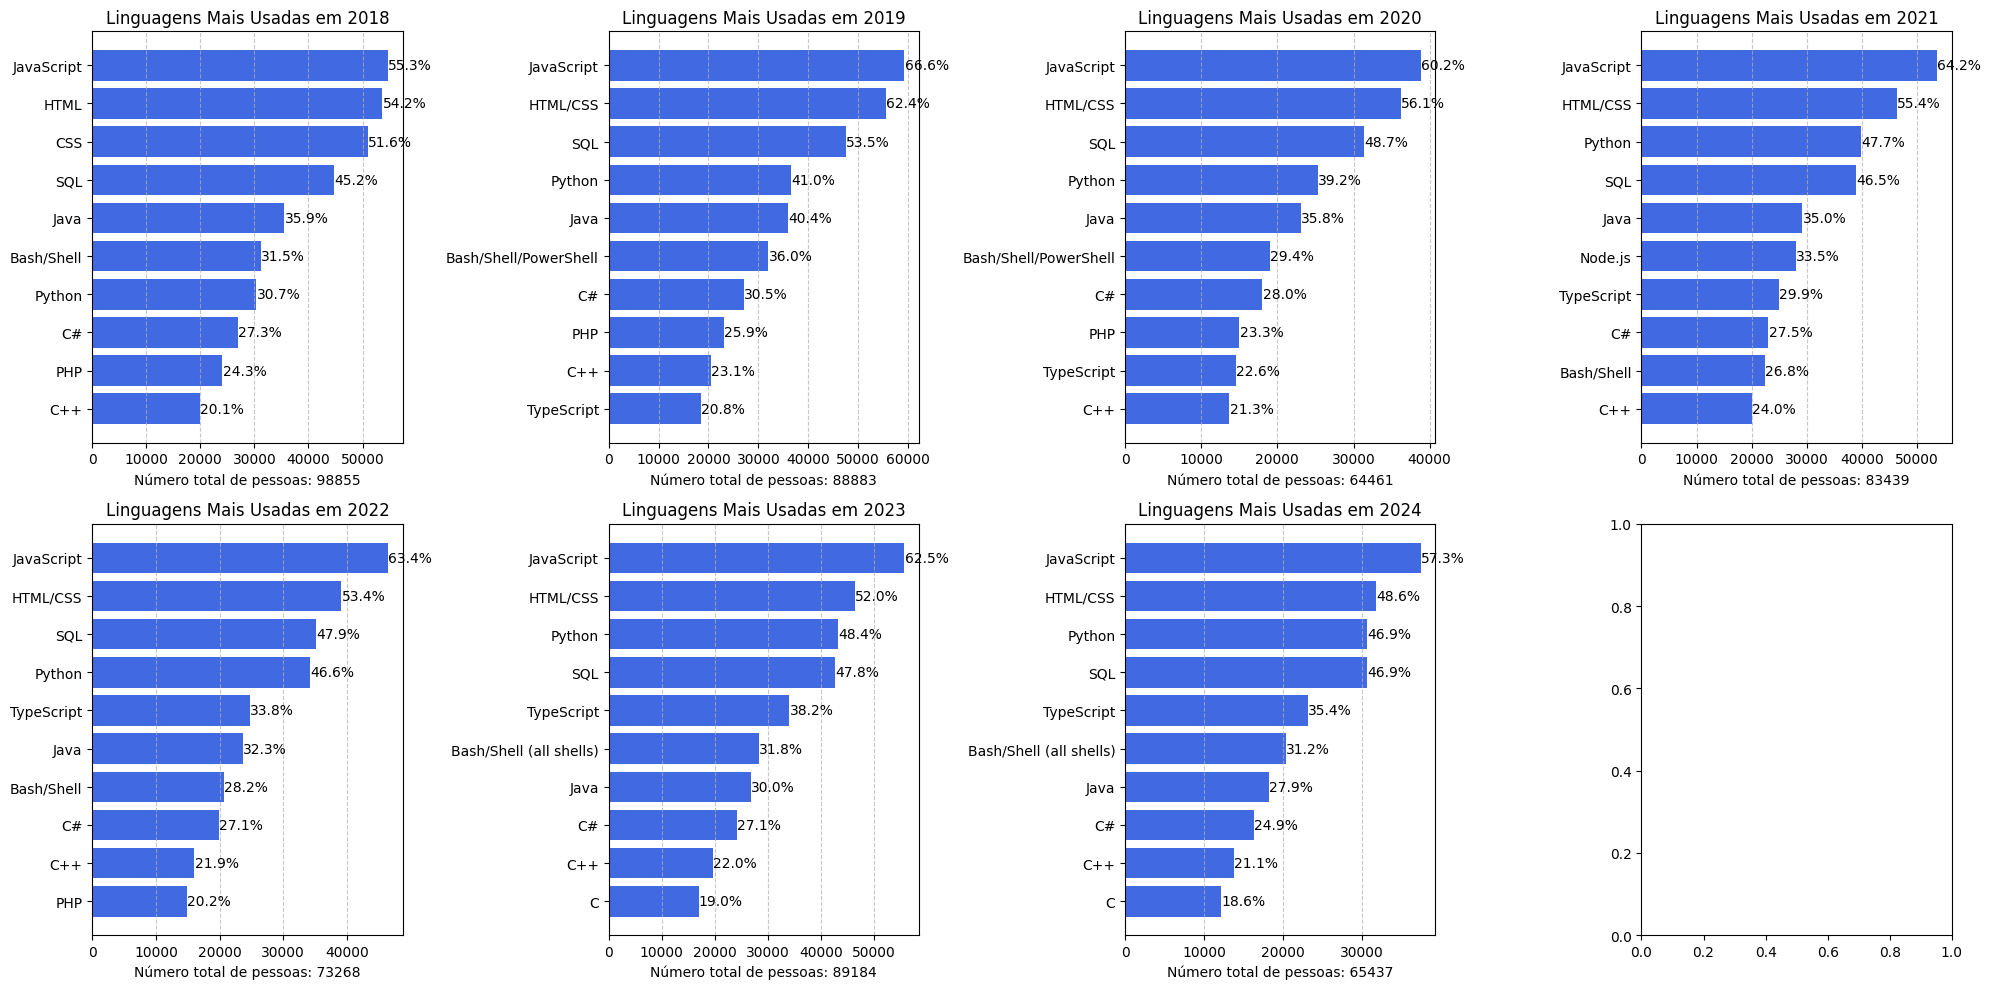

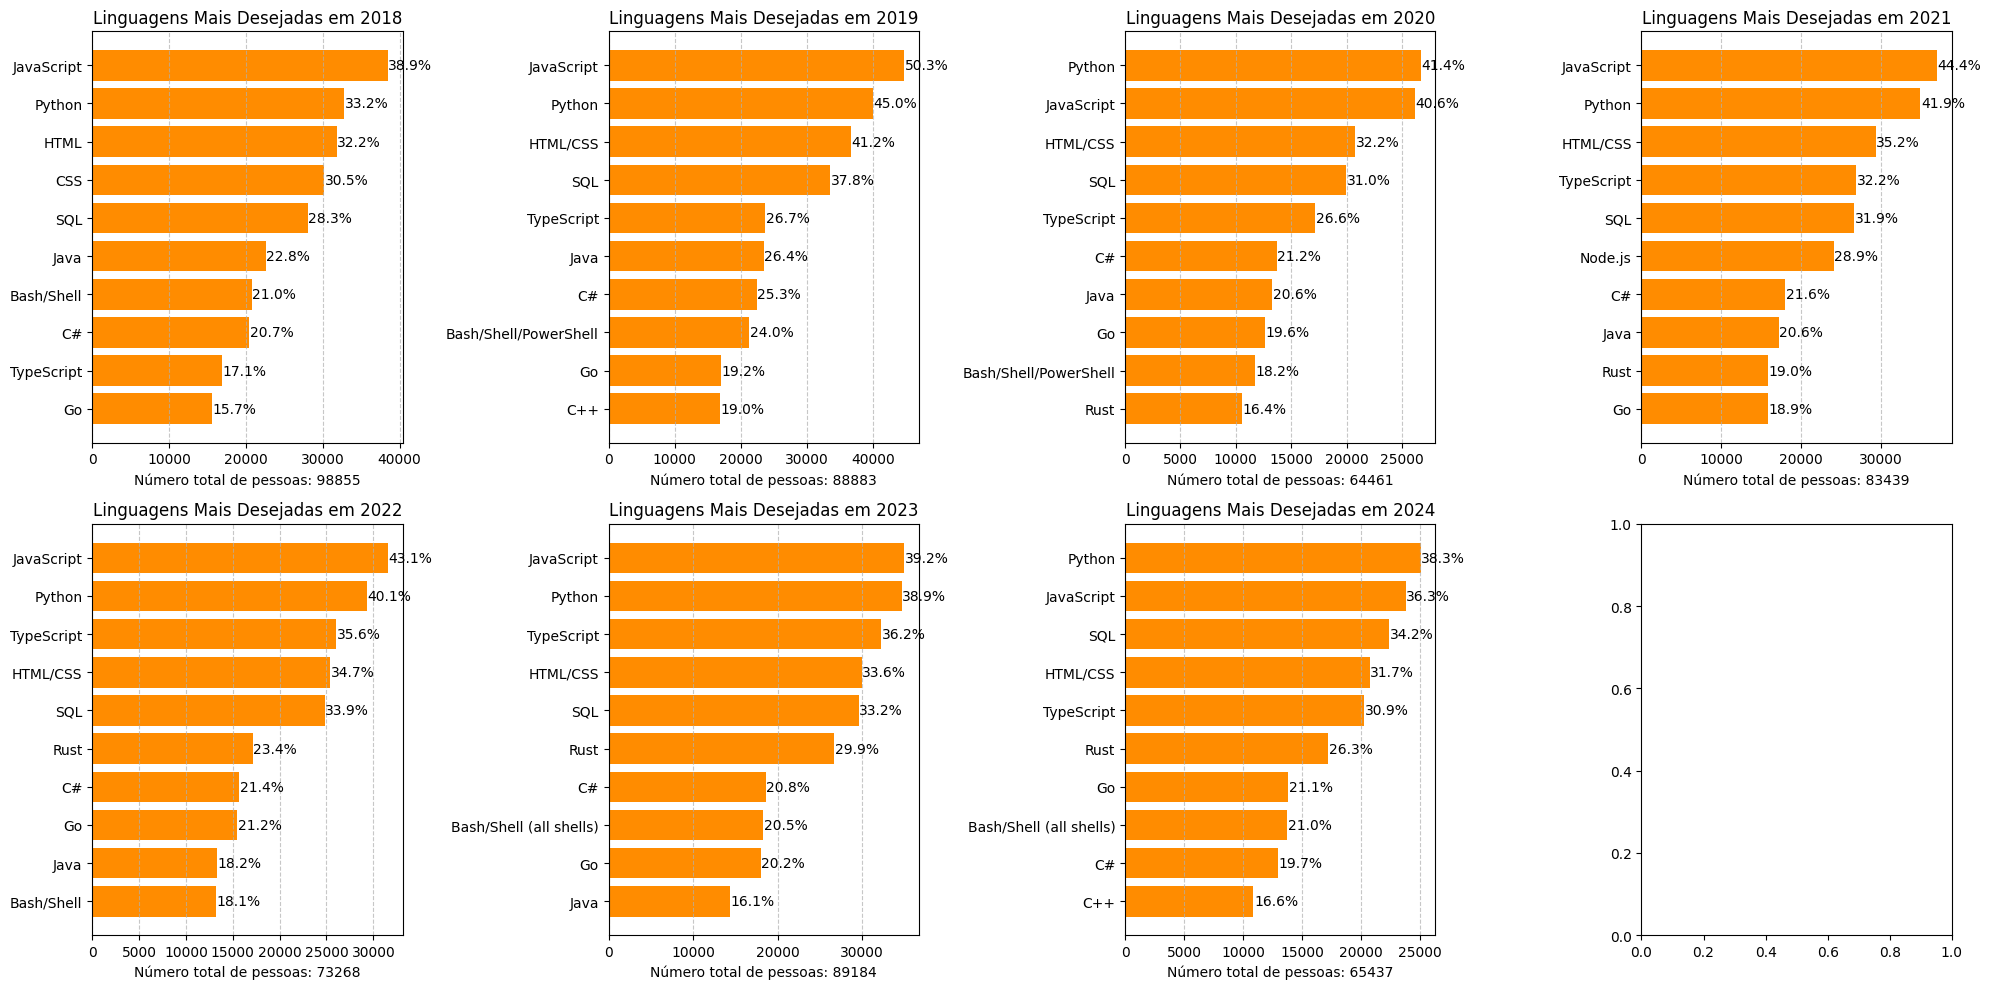

In [ ]:
# Criar os gráficos de linguagens mais usadas
fig, axes = plt.subplots(2, 4, figsize=(20, 10))  # Ajuste conforme necessário
axes = axes.flatten()

for i, (year, counter) in enumerate(linguagens_usadas.items()):
    total_respondentes = len(survey_data[year])  # Número total de respondentes
    top_languages = counter.most_common(10)  # Pegando as 10 mais usadas
    linguagens, contagens = zip(*top_languages)

    porcentagens = [f"{(c/total_respondentes)*100:.1f}%" for c in contagens]

    ax = axes[i]
    bars = ax.barh(linguagens[::-1], contagens[::-1], color='royalblue')

    # Adicionar a porcentagem na frente de cada barra
    for bar, pct in zip(bars, porcentagens[::-1]):
        ax.text(bar.get_width() + 50, bar.get_y() + bar.get_height()/2, pct, va='center')

    ax.set_xlabel(f"Número total de pessoas: {total_respondentes}")
    ax.set_title(f"Linguagens Mais Usadas em {year}")
    ax.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig("linguagens_usadas.png")  # Salva a imagem com todos os gráficos
plt.show()

# Criar os gráficos de linguagens mais desejadas
fig, axes = plt.subplots(2, 4, figsize=(20, 10))  # Ajuste conforme necessário
axes = axes.flatten()

for i, (year, counter) in enumerate(linguagens_desejadas.items()):
    total_respondentes = len(survey_data[year])
    top_languages = counter.most_common(10)
    linguagens, contagens = zip(*top_languages)

    porcentagens = [f"{(c/total_respondentes)*100:.1f}%" for c in contagens]

    ax = axes[i]
    bars = ax.barh(linguagens[::-1], contagens[::-1], color='darkorange')

    for bar, pct in zip(bars, porcentagens[::-1]):
        ax.text(bar.get_width() + 50, bar.get_y() + bar.get_height()/2, pct, va='center')

    ax.set_xlabel(f"Número total de pessoas: {total_respondentes}")
    ax.set_title(f"Linguagens Mais Desejadas em {year}")
    ax.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig("linguagens_desejadas.png")  # Salva a imagem com todos os gráficos
plt.show()

  3. #### Limpeza do dataframe
  > Linhas que, além da coluna identificadora ("Respondent" e "ResponseId"), só possuem valor `null`


In [ ]:
print(respostas_por_ano)

{'2018': [98855, 129, 1.0], '2019': [88883, 85, 0.866], '2020': [64461, 61, 0.598], '2021': [83439, 48, 0.799], '2022': [73268, 79, 0.732], '2023': [89184, 84, 0.933], '2024': [65437, 114, 0.665]}


In [ ]:
for year in survey_data.keys():
    respostas_nulas = survey_data[year][['LanguageWorkedWith', 'LanguageDesireNextYear']].isna().all(axis=1).sum()
    respostas_validas = respostas_por_ano[year][0] - respostas_nulas  # Total - Nulas
    respostas_por_ano[year].extend([respostas_nulas, respostas_validas])
print(respostas_por_ano)

{'2018': [98855, 129, 1.0, 20110, 78745], '2019': [88883, 85, 0.866, 686, 88197], '2020': [64461, 61, 0.598, 6682, 57779], '2021': [83439, 48, 0.799, 1082, 82357], '2022': [73268, 79, 0.732, 2293, 70975], '2023': [89184, 84, 0.933, 2044, 87140], '2024': [65437, 114, 0.665, 5692, 59745]}


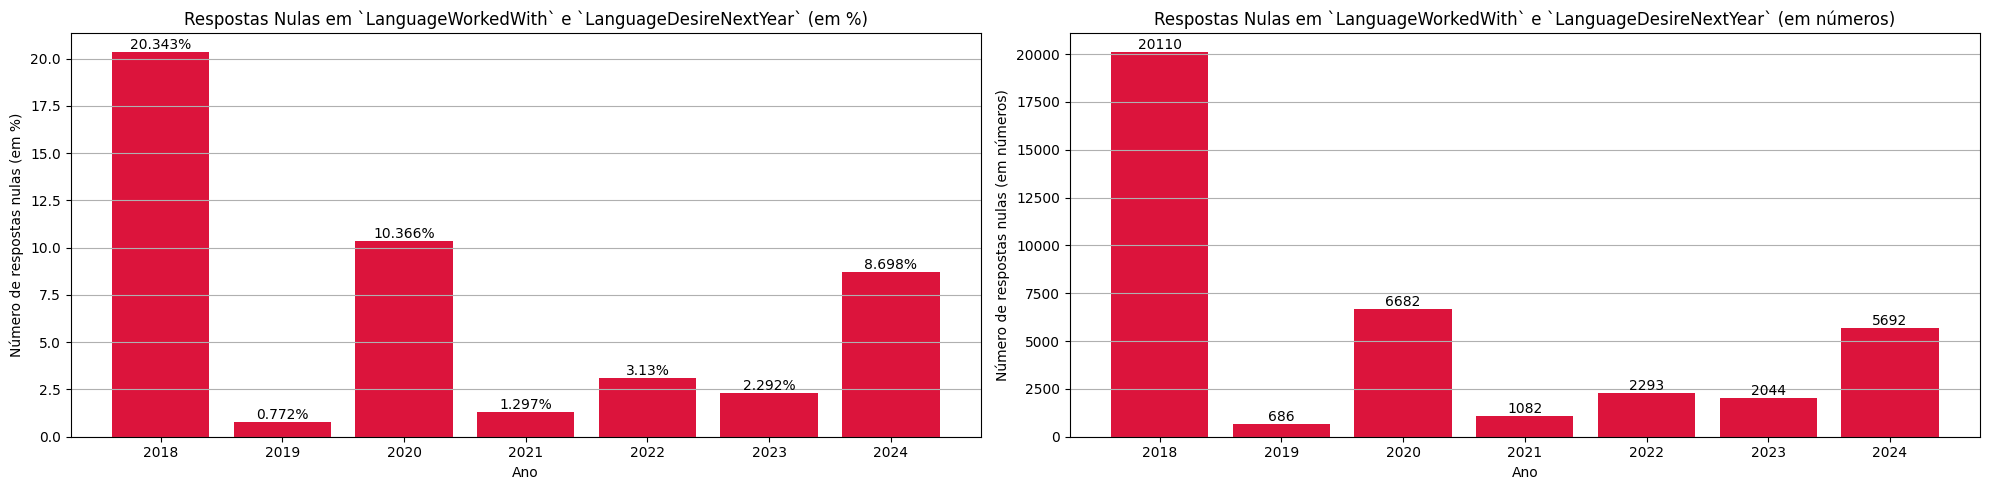

In [ ]:
anos = list(respostas_por_ano.keys())
total_respondentes = [valor[0] for valor in respostas_por_ano.values()]
percentuais_nulos = [(valor[3] / valor[0]) * 100 for valor in respostas_por_ano.values()]

# Primeiro gráfico: Porcentagem de respostas nulas
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
bars = plt.bar(anos, percentuais_nulos, color='crimson')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{round(yval, 3)}%', ha='center', va='bottom')

plt.xlabel('Ano')
plt.ylabel('Número de respostas nulas (em %)')
plt.title('Respostas Nulas em `LanguageWorkedWith` e `LanguageDesireNextYear` (em %)')
plt.grid(axis='y')
plt.yticks(np.arange(0, 20.1, 2.5))

# Segundo gráfico: Número de respostas nulas
plt.subplot(1, 2, 2)
bars = plt.bar(anos, [valor[3] for valor in respostas_por_ano.values()], color='crimson')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), str(bar.get_height()), ha='center', va='bottom')

plt.xlabel('Ano')
plt.ylabel('Número de respostas nulas (em números)')
plt.title('Respostas Nulas em `LanguageWorkedWith` e `LanguageDesireNextYear` (em números)')
plt.grid(axis='y')

plt.savefig("respostas_nulas_linguagens.png")

plt.tight_layout()
plt.show()


In [ ]:
sorted_validos = sorted([valor[4] for valor in respostas_por_ano.values()], reverse=True)  # Ordenação decrescente para normalização

# Calculando nova intensidade e adicionando ao dicionário
intensidades_validas = [round(1 - (sorted_validos.index(respostas_por_ano[year][4]) * step), 3) for year in respostas_por_ano.keys()]

for year, nova_intensidade in zip(respostas_por_ano.keys(), intensidades_validas):
    respostas_por_ano[year].append(nova_intensidade)

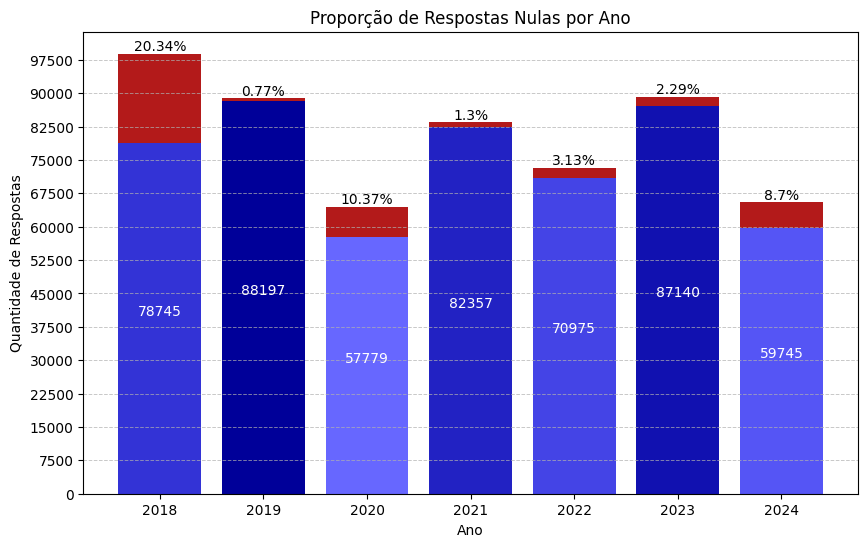

In [ ]:
plt.figure(figsize=(10, 6))

# Cores para as barras de respostas válidas
cores2 = [valor[5] for valor in respostas_por_ano.values()]
cores_rgba2 = [(0, 0, round(min(1, 1.6 - c), 2), c) for c in cores2]

# Barra inferior: respostas válidas
bars_validas = plt.bar(anos, [valor[4] for valor in respostas_por_ano.values()], color=cores_rgba2)

# Barra superior: respostas nulas empilhadas no topo das válidas
bars_nulas = plt.bar(
    anos,
    [valor[3] for valor in respostas_por_ano.values()],
    bottom=[valor[4] for valor in respostas_por_ano.values()],  # Empilha no topo das válidas
    color=(0.7, 0.1, 0.1, 1)
)

# Adicionando textos para respostas válidas e nulas
for ano, bar_valida, bar_nula, nula, total in zip(
    anos,
    bars_validas,
    bars_nulas,
    [valor[3] for valor in respostas_por_ano.values()],  # Respostas nulas
    [valor[0] for valor in respostas_por_ano.values()]   # Respostas totais
):
    # Texto para respostas válidas (dentro da barra)
    plt.text(
        bar_valida.get_x() + bar_valida.get_width() / 2,
        bar_valida.get_height() / 2,
        f'{total - nula}',
        ha='center', va='bottom', fontsize=10, color='white'
    )
    yval = bar.get_height()
    # Texto para respostas nulas (acima da barra empilhada)
    plt.text(
        bar_nula.get_x() + bar_nula.get_width() / 2,
        bar_nula.get_height() + bar_valida.get_height(),
        f"{round((nula / total) * 100, 2)}%",
        ha='center', va='bottom', fontsize=10
    )

plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.yticks(np.arange(0, 100000.1, 7500))
plt.xlabel('Ano')
plt.ylabel('Quantidade de Respostas')
plt.title('Proporção de Respostas Nulas por Ano')

plt.savefig('grafico_respostas_nulas_empilhadas.png', bbox_inches='tight')
plt.show()


  4. #### Verificação
  > Listando as colunas novamente\
  > Recontagem das linhas e colunas


# lixo?


In [ ]:
for year, df in survey_data.items():
    LanguageWorked = "LanguageWorkedWith" if "LanguageWorkedWith" in df.columns else "LanguageHaveWorkedWith"
    LanguageDesire = "LanguageDesireNextYear" if "LanguageDesireNextYear" in df.columns else "LanguageWantToWorkWith"

In [ ]:
for year, df in survey_data.items():
    cols_to_drop = df.columns[df.isna().all()].tolist()
    if cols_to_drop:
        print(f"Ano {year}: Excluindo {len(cols_to_drop)} colunas apenas com valores null:")
        print(cols_to_drop)
        survey_data[year] = df.dropna(axis=1, how="all")

In [ ]:
for year, df in survey_data.items():
    id_column = "Respondent" if "Respondent" in df.columns else "ResponseId"

    rows_to_drop = df[df.drop(columns=[id_column], errors="ignore").isna().all(axis=1)]

    if not rows_to_drop.empty:
        print(f"Ano {year}: Excluindo {rows_to_drop.shape[0]} linhas onde todos os valores são null (exceto '{id_column}')")

    survey_data[year] = df.dropna(how="all", subset=[col for col in df.columns if col != id_column])


In [ ]:
for year, df in survey_data.items():
    print(f"Colunas presentes em survey_data[{year}]: {', '.join(df.columns)}")
    print(f"Ano {year}: {df.shape[0]} linhas e {df.shape[1]} colunas")